In [1]:
! pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image,ImageOps
import librosa
import soundfile as sf
import string
import matplotlib.font_manager as fm
from matplotlib.font_manager import FontProperties

In [5]:
dir_addr = '/content/drive/MyDrive/IMAGE_DATA'

class_distribution = {}

# Traverse through the dataset directory
for cl_name in os.listdir(dir_addr):
  cl_pth = os.path.join(dir_addr, cl_name)
  if os.path.isdir(cl_pth):
    no_imgs = len([f for f in os.listdir(cl_pth) if (f.endswith('.jpeg') or f.endswith('.png'))])
    class_distribution[cl_name] = no_imgs

In [6]:
class_distribution

{'AIRPLANE': 20, 'ROBOTS': 21, 'CARS': 20, 'ELEPHANTS': 39, 'RANDOM': 20}

In [7]:
def rand_lin_recur(seed, modulus, multiplier, increment, num_values):
  values = set()  # Use a set to store distinct values
  value = seed
  while len(values) < num_values:
    value = (multiplier * value + increment) % modulus
    values.add(value)
  return list(values)
classes = list(class_distribution.keys())
counts = list(class_distribution.values())
classes
counts

[20, 21, 20, 39, 20]

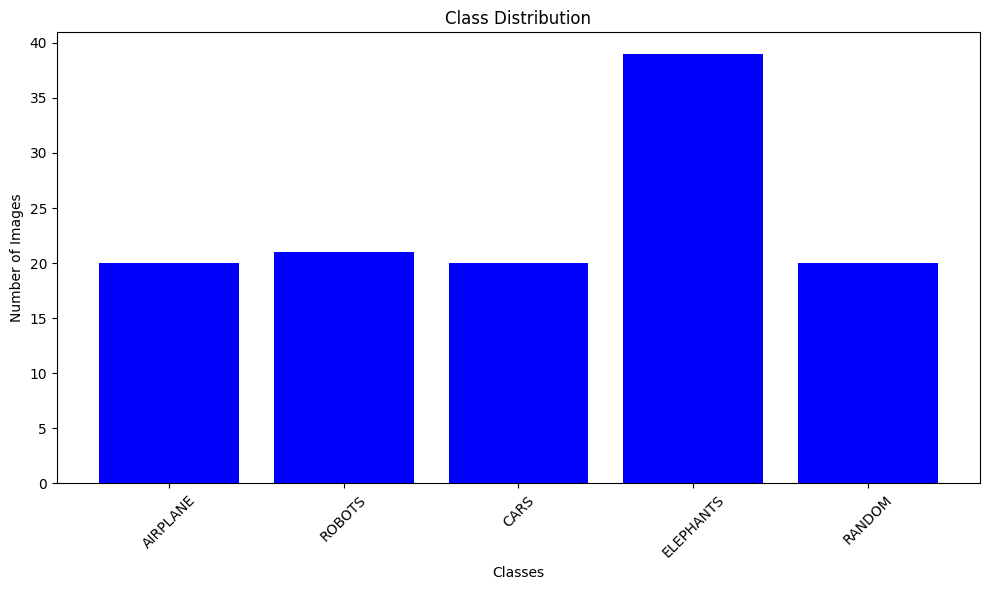

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color='blue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.tight_layout()

In [9]:
mean_count = np.mean(counts)
imbalanced_classes = [cls for cls, count in class_distribution.items() if count < mean_count]
print(mean_count)
print(imbalanced_classes)

24.0
['AIRPLANE', 'ROBOTS', 'CARS', 'RANDOM']


In [10]:
if imbalanced_classes:
  print("Imbalanced classes:", imbalanced_classes)
  print("Suggested methods to balance the dataset:")
  print("- Data augmentation: Generate variations of existing images.")
  print("- Oversampling: Increase the number of instances in imbalanced classes.")
  print("- Undersampling: Reduce the number of instances in majority classes.")
else:
  print("The dataset is balanced.")


Imbalanced classes: ['AIRPLANE', 'ROBOTS', 'CARS', 'RANDOM']
Suggested methods to balance the dataset:
- Data augmentation: Generate variations of existing images.
- Oversampling: Increase the number of instances in imbalanced classes.
- Undersampling: Reduce the number of instances in majority classes.


In [11]:
plt.show()



> Indented blockSuggested methods to balance the dataset(common methods are):
1. Resampling:
Oversampling: Increase the number of instances in the minority class by duplicating existing instances or generating synthetic data points.
Undersampling: Decrease the number of instances in the majority class by randomly removing samples.
2. Data Augmentation:
Generate new data instances for the minority class by applying transformations like rotations, flips, crops, and noise to existing samples.
3. Synthetic Data Generation:
Use techniques like Synthetic Minority Over-sampling Technique (SMOTE) to create synthetic samples for the minority class based on interpolation of existing samples.
4. Weighted Loss Function:
Adjust the loss function during training to give more weight to the minority class, thereby focusing the model's attention on it.
5. Ensemble Methods:
Utilize ensemble techniques like EasyEnsemble or BalanceCascade, which train multiple models on different balanced subsets of the data and combine their predictions.
6. Transfer Learning:
Pretrain a model on a related dataset or a different task, and then fine-tune it on your imbalanced dataset.



Question 2

In [12]:
classes

['AIRPLANE', 'ROBOTS', 'CARS', 'ELEPHANTS', 'RANDOM']

In [16]:
img_paths = []
for cl_name in  classes:
  cl_path = os.path.join(dir_addr,cl_name)
  if os.path.isdir(cl_path):
      class_imag = [(os.path.join(cl_path, f),cl_name) for f in os.listdir(cl_path) if f.endswith('.jpeg') or f.endswith('.png')]
      img_paths.extend(class_imag)


In [17]:
print(img_paths)

[('/content/drive/MyDrive/IMAGE_DATA/AIRPLANE/images (9).jpeg', 'AIRPLANE'), ('/content/drive/MyDrive/IMAGE_DATA/AIRPLANE/images (2).jpeg', 'AIRPLANE'), ('/content/drive/MyDrive/IMAGE_DATA/AIRPLANE/images (17).jpeg', 'AIRPLANE'), ('/content/drive/MyDrive/IMAGE_DATA/AIRPLANE/images (5).jpeg', 'AIRPLANE'), ('/content/drive/MyDrive/IMAGE_DATA/AIRPLANE/images (16).jpeg', 'AIRPLANE'), ('/content/drive/MyDrive/IMAGE_DATA/AIRPLANE/images (20).jpeg', 'AIRPLANE'), ('/content/drive/MyDrive/IMAGE_DATA/AIRPLANE/images (19).jpeg', 'AIRPLANE'), ('/content/drive/MyDrive/IMAGE_DATA/AIRPLANE/images (3).jpeg', 'AIRPLANE'), ('/content/drive/MyDrive/IMAGE_DATA/AIRPLANE/images (6).jpeg', 'AIRPLANE'), ('/content/drive/MyDrive/IMAGE_DATA/AIRPLANE/images (4).jpeg', 'AIRPLANE'), ('/content/drive/MyDrive/IMAGE_DATA/AIRPLANE/images (14).jpeg', 'AIRPLANE'), ('/content/drive/MyDrive/IMAGE_DATA/AIRPLANE/images (11).jpeg', 'AIRPLANE'), ('/content/drive/MyDrive/IMAGE_DATA/AIRPLANE/images (8).jpeg', 'AIRPLANE'), ('/co

In [18]:
# Simulate randomness using a deterministic approach with linear recurrence
num_images_to_select = 8
all_indices = np.arange(len(img_paths))
selected_indices = rand_lin_recur(seed=0, modulus=len(img_paths), multiplier=1664525, increment=1013904223, num_values=num_images_to_select)

# Get the corresponding image paths based on selected indices
selected_img_paths = [img_paths[i][0] for i in selected_indices]
selected_labels = [img_paths[i][1] for i in selected_indices]


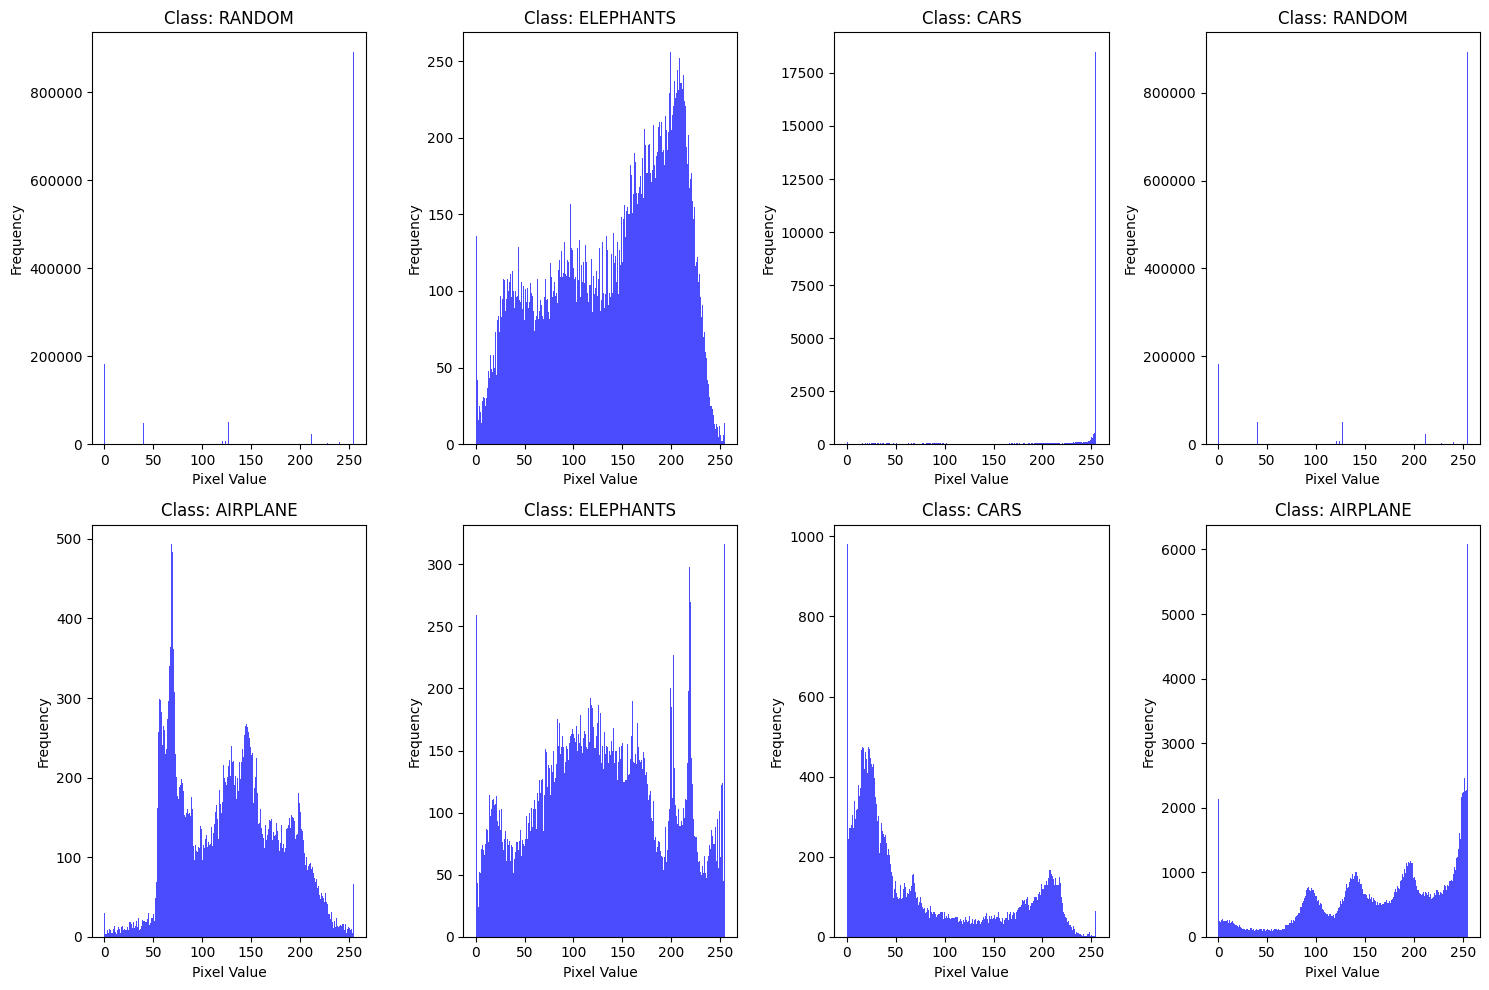

In [19]:
# Plot histograms and labels for selected images
plt.figure(figsize=(15, 10))
for i, (image_path, cl_name) in enumerate(zip(selected_img_paths, selected_labels)):
  plt.subplot(2, 4, i + 1)

  image = Image.open(image_path)
  image_array = np.array(image)
  flattened_image_array = image_array.ravel()

  plt.hist(flattened_image_array, bins=256, color='blue', alpha=0.7)
  plt.title(f"Class: {cl_name}")
  plt.xlabel("Pixel Value")
  plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Question 3

In [20]:
class_stats = {}
for cl_name in os.listdir(dir_addr):
    # print(cl_name)
  cl_path = os.path.join(dir_addr, cl_name)
  if os.path.isdir(cl_path):
    cl_imgs = [f for f in os.listdir(cl_path) if f.endswith('.jpeg') or f.endswith('.png')]

    cl_pxl_val = []
    for image_fl_name in cl_imgs:
      img_path = os.path.join(cl_path, image_fl_name)
      image = Image.open(img_path)
      image_array = np.array(image)
      cl_pxl_val.extend(image_array.ravel())

    class_mean = np.mean(cl_pxl_val)
    class_variance = np.var(cl_pxl_val)

    class_stats[cl_name] = {'mean': class_mean, 'variance': class_variance}

print(class_stats)

{'AIRPLANE': {'mean': 141.39232, 'variance': 5022.893663295746}, 'ROBOTS': {'mean': 141.45145345889136, 'variance': 7288.705503112546}, 'CARS': {'mean': 97.83207992733878, 'variance': 6538.893294480183}, 'ELEPHANTS': {'mean': 120.26171829068332, 'variance': 4651.7021354791505}, 'RANDOM': {'mean': 199.2280095621745, 'variance': 9667.505746380642}}


In [21]:
for i in class_stats:
  print(i,class_stats[i])

AIRPLANE {'mean': 141.39232, 'variance': 5022.893663295746}
ROBOTS {'mean': 141.45145345889136, 'variance': 7288.705503112546}
CARS {'mean': 97.83207992733878, 'variance': 6538.893294480183}
ELEPHANTS {'mean': 120.26171829068332, 'variance': 4651.7021354791505}
RANDOM {'mean': 199.2280095621745, 'variance': 9667.505746380642}


From the mean and variance values for each class, we can make a few observations about the pixel intensity distribution within each class:

Mean Pixel Value:
The mean pixel value provides a rough estimate of the overall brightness of the images within a class.
Higher mean values typically indicate brighter images, while lower mean values suggest darker images.

Variance of Pixel Values:
Variance measures the spread or dispersion of pixel values around the mean.
Higher variance indicates greater variability in pixel intensities, while lower variance suggests more consistent pixel values.
Based on the mean and variance values you've provided for each class:

The class with the highest mean pixel value is 'RANDOM' with a mean of approximately 199.23. This indicates that the images in this class tend to be brighter on average.
The class with the lowest mean pixel value is 'CARS' with a mean of around 97.83. This suggests that the images in this class tend to be darker on average compared to the other classes.
The class with the highest variance is 'RANDOM' with a variance of approximately 9667.51. This implies that the pixel values within images of this class have a wide range of variability in intensity.
The class with the lowest variance is 'AIRPLANE' with a variance of about 5022.89. This indicates that the pixel values in the images of this class are relatively more consistent in terms of intensity.

Question 4



In [13]:
# random_class = random.choice(classes)
random_cl_path = os.path.join(dir_addr,"RANDOM")
# print(random_class)
print(random_cl_path)

/content/drive/MyDrive/IMAGE_DATA/RANDOM


In [14]:
# List of images in the random class
rand_imgs = [f for f in os.listdir(random_cl_path) if f.endswith('.jpeg') or f.endswith('.png')]

# Deterministically select 4 random images from the list using linear recurrence
num_images_to_select = 4
selected_indices = rand_lin_recur(seed=0, modulus=len(rand_imgs), multiplier=1664525, increment=1013904223, num_values=num_images_to_select)

selected_imgs = [rand_imgs[i] for i in selected_indices]



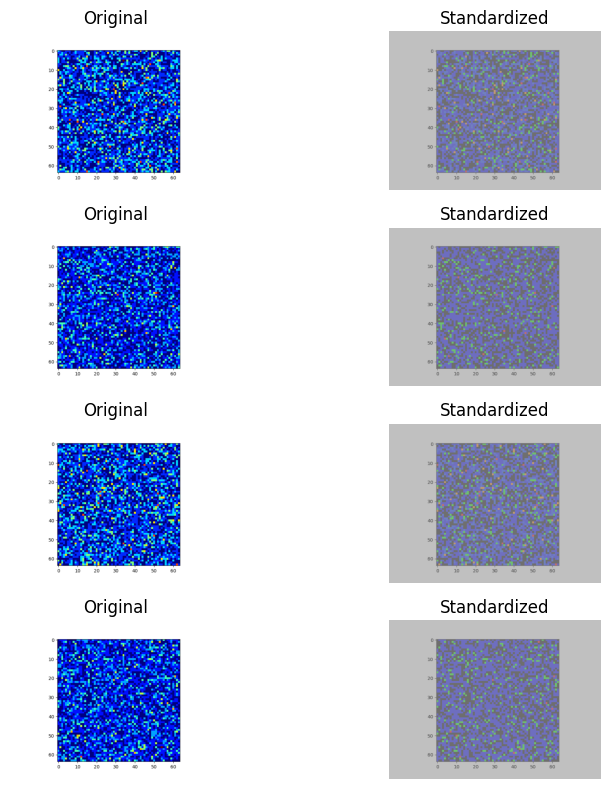

In [15]:
plt.figure(figsize=(12, 8))
for i, img_fl_name in enumerate(selected_imgs):
  img_path = os.path.join(random_cl_path, img_fl_name)
  org_img = Image.open(img_path)
  img_array = np.array(org_img)
  stand_img_array = (img_array - np.mean(img_array)) / np.std(img_array)

  plt.subplot(4, 3, i * 3 + 1)
  plt.imshow(img_array, cmap='gray')
  plt.title("Original")
  plt.axis("off")

  plt.subplot(4, 3, i * 3 + 2)
  plt.imshow(stand_img_array, cmap='gray')
  plt.title("Standardized")
  plt.axis("off")

plt.tight_layout()
plt.show()



1. Original Images:
Original images are the raw, unmodified representations of the data. In the context of images, pixel values can vary widely, ranging from 0 (black) to 255 (white) for grayscale images. Color images have pixel values in multiple channels (Red, Green, Blue) for each pixel.

2. Standardized Images:
Standardization involves transforming the pixel values of images in a way that they have a mean of 0 and a standard deviation of 1. This process is also known as z-score normalization. Standardization doesn't change the visual content of the image but rather changes the scale and distribution of pixel values.

Observations:
When plotted the original and standardized images side by side,we noticed:

Similar Brightness and Contrast: Standardization tends to make the images look visually more similar to each other in terms of brightness and contrast. The images might appear to have a consistent level of illumination.

Details Retained: Standardization doesn't remove or distort the essential features of the images. The shapes, structures, and content remain the same. It's just that the overall brightness and contrast might be adjusted.

Impact on Model Training: Standardized data can lead to more stable and faster convergence during model training. Machine learning algorithms often perform better when the features are on a similar scale, as it can prevent certain features from dominating the learning process.

Data Preprocessing: Standardization is one of the preprocessing steps that can be applied to input data before feeding it into a machine learning model. It helps the model learn patterns from the data more effectively.

Pixel Intensity Distribution: While the pixel values of standardized images might have a mean of 0 and a standard deviation of 1, their original relationships and distribution still hold. This is important because the model should learn the patterns from the actual data distribution.

Standardization is a technique to ensure that the input data to the model has a consistent scale and distribution.While standardization can be beneficial for certain types of algorithms (e.g., those sensitive to feature scales), it might not be necessary or helpful for all types of data and tasks.

Question 5

In [22]:
img_pths = []
for cl_name in  classes:
  cl_path = os.path.join(dir_addr, cl_name)
  if os.path.isdir(cl_path):
    class_imag = [(os.path.join(cl_path, f), cl_name) for f in os.listdir(cl_path) if f.endswith('.jpeg') or f.endswith('.png')]
    img_pths.extend(class_imag)
# Select a class path deterministically using linear recurrence
class_indices = rand_lin_recur(seed=0, modulus=len(classes), multiplier=1664525, increment=1013904223, num_values=1)
random_class_path = os.path.join(dir_addr, classes[class_indices[0]])


# List of images in the selected class
random_class_imgs = [f for f in os.listdir(random_class_path) if f.endswith('.jpeg') or f.endswith('.png')]

# Select a random image deterministically using linear recurrence
image_indices = rand_lin_recur(seed=0, modulus=len(random_class_imgs), multiplier=1664525, increment=1013904223, num_values=1)
random_image = random_class_imgs[image_indices[0]]


In [23]:
# Open the original image
org_img_pth = os.path.join(random_class_path, random_image)
original_img = Image.open(org_img_pth)

In [24]:
# Determine rotation angle deterministically using linear recurrence
rotation_angles = rand_lin_recur(seed=0, modulus=31, multiplier=1664525, increment=1013904223, num_values=1)
random_rotation_angle = -15 + rotation_angles[0]

# Rotate the image
rotated_img = original_img.rotate(random_rotation_angle, resample=Image.BILINEAR, expand=True)

# Perform cropping deterministically using linear recurrence
crop_x_values = rand_lin_recur(seed=0, modulus=original_img.width - 50 + 1, multiplier=1664525, increment=1013904223, num_values=1)
crop_y_values = rand_lin_recur(seed=0, modulus=original_img.height - 50 + 1, multiplier=1664525, increment=1013904223, num_values=1)
crop_x = crop_x_values[0]
crop_y = crop_y_values[0]
crop_width = min(original_img.width - crop_x, 50)
crop_height = min(original_img.height - crop_y, 50)
cropped_img = original_img.crop((crop_x, crop_y, crop_x + crop_width, crop_y + crop_height))

# Determine scaling factor deterministically using linear recurrence
scale_factors = rand_lin_recur(seed=0, modulus=90, multiplier=1664525, increment=1013904223, num_values=1)
scale_factor = 1.0 + (scale_factors[0] / 10.0)

# Perform scaling
scaled_width = int(original_img.width * scale_factor)
scaled_height = int(original_img.height * scale_factor)
scaled_img = original_img.resize((scaled_width, scaled_height))


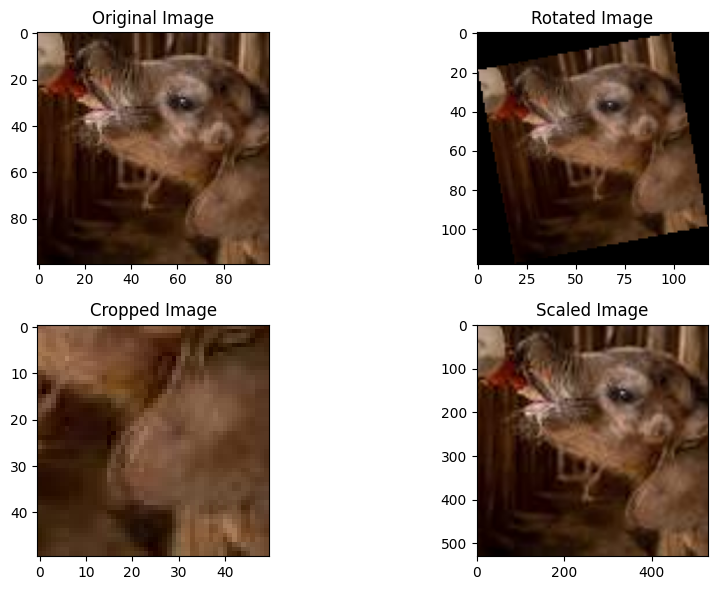

In [25]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.imshow(original_img)
plt.title('Original Image')
# plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(rotated_img)
plt.title('Rotated Image')
# plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cropped_img)
plt.title('Cropped Image')
# plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(scaled_img)
plt.title('Scaled Image')
# plt.axis('off')

plt.tight_layout()
plt.show()

# Part B

In [31]:
dir_addr = '/content/drive/MyDrive/AUDIO_DATA'

class_distribution = {}

# Traverse through the dataset directory
for class_name in os.listdir(dir_addr):
  class_path = os.path.join(dir_addr, class_name)
  if os.path.isdir(class_path):
    num_images = len([f for f in os.listdir(class_path) if (f.endswith('.wav') or f.endswith('.mp3'))])
    class_distribution[class_name] = num_images

Question 1

In [32]:
class_distribution

{'CLASS 2': 10, 'CLASS 5': 10, 'CLASS 4': 10, 'CLASS 1': 10, 'CLASS 3': 16}

In [33]:
classes = list(class_distribution.keys())
counts = list(class_distribution.values())
print(classes,counts)

['CLASS 2', 'CLASS 5', 'CLASS 4', 'CLASS 1', 'CLASS 3'] [10, 10, 10, 10, 16]


In [34]:
class_durations = {}  # Dictionary to store class durations

# Get a list of all class directories
class_directories = [class_name for class_name in os.listdir(dir_addr) if os.path.isdir(os.path.join(dir_addr, class_name))]
aud_pths = []

# Iterate through each class
for class_name in class_directories:
  class_path = os.path.join(dir_addr, class_name)
  class_durations[class_name] = []

  # Iterate through audio files in the class
  for audio_file in os.listdir(class_path):
    audio_path = os.path.join(class_path, audio_file)
    aud_pths.append(audio_path)
    audio, _ = librosa.load(audio_path, sr=None)
    duration = len(audio) / _
    class_durations[class_name].append(duration)




# class_durations = {}  # Dictionary to store class durations

# # Get a list of all class directories
# class_directories = [class_name for class_name in os.listdir(dir_addr) if os.path.isdir(os.path.join(dir_addr, class_name))]
# aud_pths = []

# # Iterate through each class
# for class_name in class_directories:
#   class_path = os.path.join(dir_addr, class_name)
#   class_durations[class_name] = []

#   # Iterate through audio files in the class
#   for audio_file in os.listdir(class_path):
#       # if audio_file.endswith('.wav') or audio_file.endswith('.mp3'):
#     audio_path = os.path.join(class_path, audio_file)
#     aud_pths.append(audio_path)
#     audio, _ = librosa.load(audio_path, sr=None)
#     duration = librosa.get_duration(y=audio)
#     class_durations[class_name].append(duration)


In [35]:
# Calculate mean audio length for each class
class_mean_durations = {class_name: sum(durations) / len(durations) for class_name, durations in class_durations.items()}




# # Calculate the mean duration for each class
# class_mean_durations = {class_name: sum(durations) / len(durations) for class_name, durations in class_durations.items()}
# print(aud_pths)

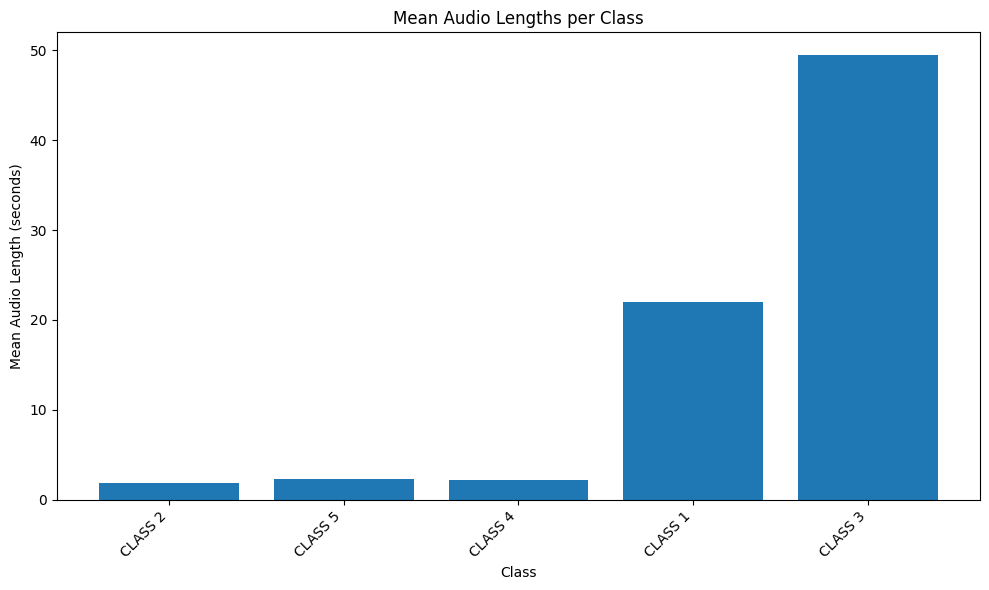

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(class_mean_durations.keys(), class_mean_durations.values())
plt.xlabel('Class')
plt.ylabel('Mean Audio Length (seconds)')
plt.title('Mean Audio Lengths per Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [37]:
# Calculate the overall mean audio length
overall_mean_duration = sum(class_mean_durations.values()) / len(class_mean_durations)


# Calculate class imbalance ratio
max_mean_duration = max(class_mean_durations.values())
min_mean_duration = min(class_mean_durations.values())
imbalance_ratio = max_mean_duration / min_mean_duration

# Check for class imbalance and suggest balancing methods
# if imbalance_ratio > 2.0:
#     print("Class imbalance detected.")
#     print("Imbalance ratio:", imbalance_ratio)

#     # Suggestions for balancing methods
#     print("Suggestions for balancing the dataset:")
#     # print("- Collect more data for classes with shorter mean durations.")
#     # print("- Augment the audio data for classes with shorter mean durations.")
#     # print("- Use data resampling techniques to balance class distributions.")
#     print(f"Class {class_name} is imbalanced.")
#     print("Suggested methods to balance:")
#     print("- Collect more data for this class.")
#     print("- Apply data augmentation techniques.")
#     print("- Resample the class to balance the dataset.")
#     print("- Use weighted loss in training.")
# else:
#     print("No significant class imbalance detected.")
# Check for class imbalance and suggest balancing methods
for class_name, mean_duration in class_mean_durations.items():
  if mean_duration > 2.0 * min_mean_duration:
    imbalanced_classes.append(class_name)
    print(f"Class {class_name} is imbalanced.")
    print("Suggested methods to balance:")
    print("- Collect more data for this class.")
    print("- Apply data augmentation techniques.")
    print("- Resample the class to balance the dataset.")
    print("- Use weighted loss in training.")

if len(imbalanced_classes) > 0:
  print("Class imbalance detected.")
  print("Imbalanced classes:", imbalanced_classes)
else:
  print("No significant class imbalance detected.")





print("Mean audio lengths for each class (in seconds):")
for class_name, mean_duration in class_mean_durations.items():
  print(f"{class_name}: {mean_duration:.2f} seconds")

print("Overall mean audio length:", overall_mean_duration)







# for class_name, mean_duration in class_mean_durations.items():
#     print(f"Class: {class_name}, Mean Duration: {mean_duration:.2f} seconds")

# max_mean_duration = max(class_mean_durations.values())
# min_mean_duration = min(class_mean_durations.values())
# threshold_multiplier = (max_mean_duration - min_mean_duration) / min_mean_duration
# print(threshold_multiplier)
# max_mean_duration = max(class_mean_durations.values())
# dynamic_threshold = threshold_multiplier * max_mean_duration
# print(dynamic_threshold)

# print("Imbalanced classes:")
# for class_name, mean_duration in class_mean_durations.items():
#   # print(mean_duration,dynamic_threshold)
#   if mean_duration > dynamic_threshold:
#       print(f"Class {class_name} is imbalanced.")
#       print("Suggested methods to balance:")
#       print("- Collect more data for this class.")
#       print("- Apply data augmentation techniques.")
#       print("- Resample the class to balance the dataset.")
#       print("- Use weighted loss in training.")
#   else:
#       print(f"Class {class_name} is balanced.")


# if len(class_mean_durations) == 0:
#     print("No valid audio files found in the class directories.")
# else:
#     # Calculate dynamic threshold based on mean durations and threshold multiplier
#     max_mean_duration = max(class_mean_durations.values())
#     threshold_multiplier = 1.5  # Adjust this value as needed based on your dataset
#     dynamic_threshold = threshold_multiplier * max_mean_duration

#     # Print mean audio lengths and suggest methods to balance the dataset
#     for class_name, mean_duration in class_mean_durations.items():
#         print(f"Class: {class_name}, Mean Duration: {mean_duration:.2f} seconds")
#         if mean_duration > dynamic_threshold:
#             print(f"Class {class_name} is imbalanced.")
#             print("Suggested methods to balance:")
#             print("- Collect more data for this class.")
#             print("- Apply data augmentation techniques.")
#             print("- Resample the class to balance the dataset.")
#             print("- Use weighted loss in training.")

#     print("Dynamic Threshold:", dynamic_threshold)

Class CLASS 1 is imbalanced.
Suggested methods to balance:
- Collect more data for this class.
- Apply data augmentation techniques.
- Resample the class to balance the dataset.
- Use weighted loss in training.
Class CLASS 3 is imbalanced.
Suggested methods to balance:
- Collect more data for this class.
- Apply data augmentation techniques.
- Resample the class to balance the dataset.
- Use weighted loss in training.
Class imbalance detected.
Imbalanced classes: ['AIRPLANE', 'ROBOTS', 'CARS', 'RANDOM', 'CLASS 1', 'CLASS 3']
Mean audio lengths for each class (in seconds):
CLASS 2: 1.89 seconds
CLASS 5: 2.30 seconds
CLASS 4: 2.17 seconds
CLASS 1: 21.97 seconds
CLASS 3: 49.53 seconds
Overall mean audio length: 15.57288147002551


Question 2

In [38]:
num_audio_files_to_select = 4
all_indices = np.arange(len(aud_pths))

# Generate distinct indices using linear recurrence
selected_indices = rand_lin_recur(seed=0, modulus=len(aud_pths), multiplier=1664525, increment=1013904223, num_values=num_audio_files_to_select)

# Get the corresponding audio file paths based on selected indices
random_audio_files = [aud_pths[i] for i in selected_indices]
# print(random_audio_files)

Methods that can be considered to balance an imbalanced audio dataset:

Data Augmentation:
Apply transformations to existing audio samples to create new samples. For audio data, you can use techniques like time stretching, pitch shifting, adding noise, and changing speed to generate variations of the existing audio clips.

Oversampling:
Duplicate or replicate samples from the minority class to increase its representation in the dataset. Be cautious not to overdo it, as exact duplication can lead to overfitting.

Undersampling:
Randomly remove samples from the majority class to reduce its dominance in the dataset. This can help balance class representation, but it might lead to loss of information.

SMOTE (Synthetic Minority Over-sampling Technique):
SMOTE generates synthetic samples for the minority class by interpolating between existing samples. This helps create a more diverse and balanced dataset.

Class-Weighted Loss:
Modify the loss function during training to give higher weights to the samples from the minority class. This makes the model focus more on the minority class during training.

Collect More Data:
Acquire additional audio samples for the minority class to increase its representation. This can be achieved through manual collection or by using crowd-sourcing platforms.

Transfer Learning:
Use pre-trained models on a related task or a larger dataset, and fine-tune them on your imbalanced dataset. This can help leverage the knowledge learned from a more balanced source.

Ensemble Methods:
Create an ensemble of models trained on different balanced subsets of the dataset. Combine their predictions to make final decisions.

Custom Sampling Strategies:
Design custom sampling strategies that dynamically balance the batches during training. For example, you can use a mix of oversampling, undersampling, and random sampling.

Generate Synthetic Data:
Utilize generative models like Variational Autoencoders (VAEs) or Generative Adversarial Networks (GANs) to generate synthetic audio samples for the minority class.

Data Editing Techniques:
Manually review and edit existing samples in the minority class to introduce small variations that make them distinct but still representative of the class.

Combination of Techniques:
Often, a combination of different methods works best. Experiment with various techniques and monitor the impact on model performance.

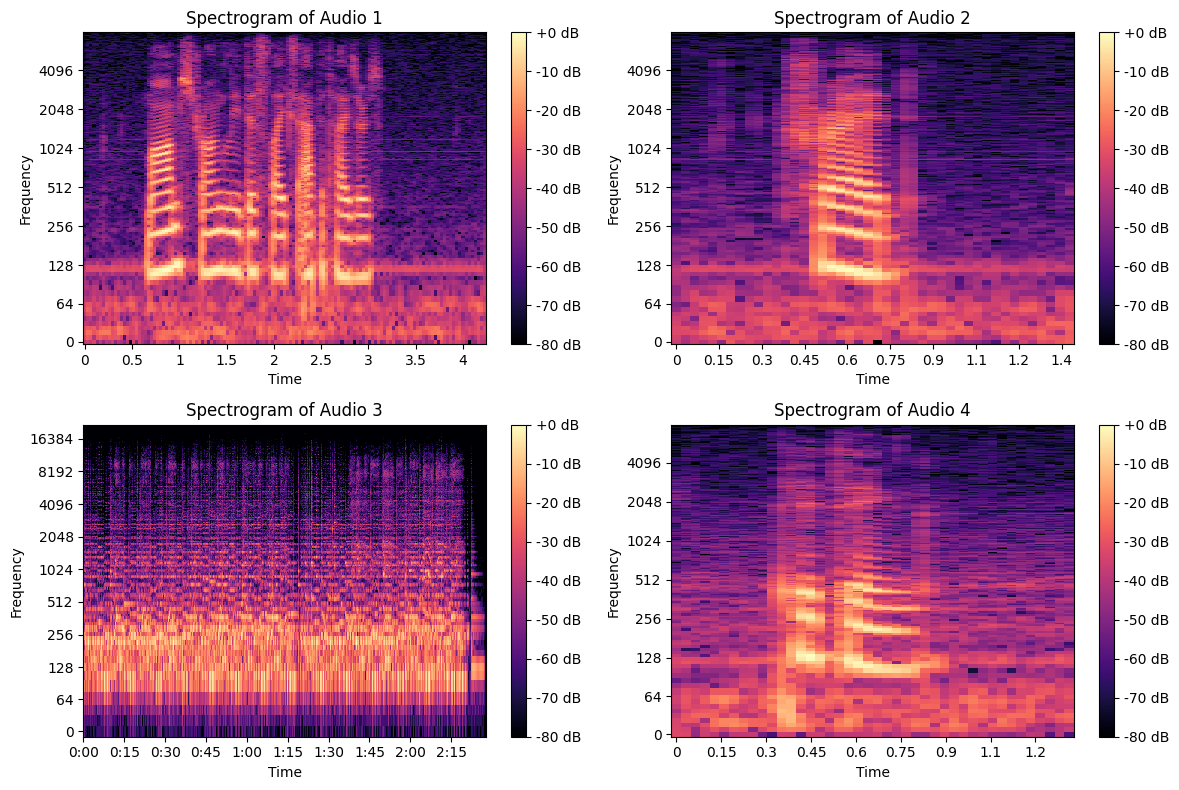

In [39]:
plt.figure(figsize=(12, 8))
for i, audio_path in enumerate(random_audio_files):
  audio, sample_rate = librosa.load(audio_path, sr=None)
  plt.subplot(2, 2, i + 1)

  spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
  librosa.display.specshow(spectrogram, sr=sample_rate, x_axis='time', y_axis='log')
  plt.colorbar(format='%+2.0f dB')
  plt.title(f"Spectrogram of Audio {i+1}")
  plt.xlabel("Time")
  plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Question 3

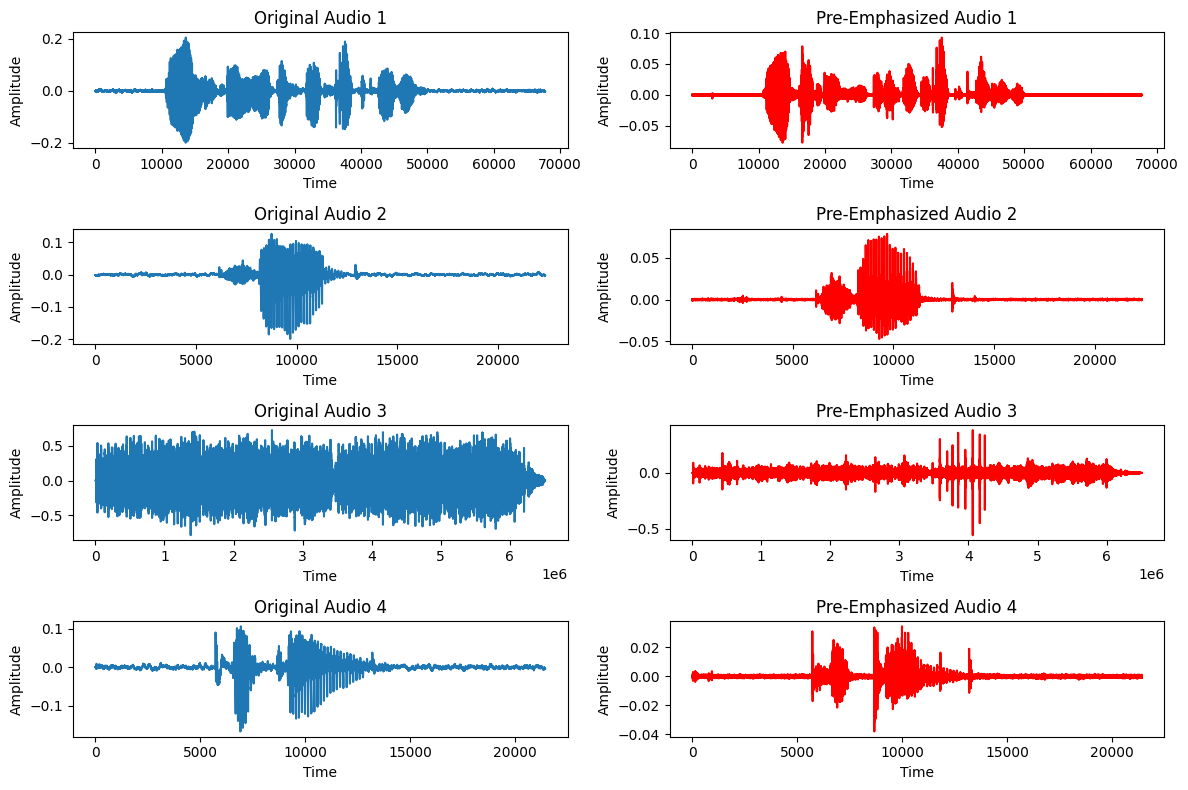

In [40]:
# Plot original and pre-emphasized audio signals
alpha = 0.97
plt.figure(figsize=(12, 8))
def pre_emphasis(signal, alpha):
  emphasizedSignal = np.append(signal[0], signal[1:] - alpha * signal[:-1])
  return emphasizedSignal

for i, audio_path in enumerate(random_audio_files):
  audio, sample_rate = librosa.load(audio_path, sr=None)

  # Apply pre-emphasis
  pre_emphasized_audio = pre_emphasis(audio, alpha)

  plt.subplot(4, 2, i * 2 + 1)
  plt.plot(audio)
  plt.title(f"Original Audio {i+1}")
  plt.xlabel("Time")
  plt.ylabel("Amplitude")

  plt.subplot(4, 2, i * 2 + 2)
  plt.plot(pre_emphasized_audio, color='red')
  plt.title(f"Pre-Emphasized Audio {i+1}")
  plt.xlabel("Time")
  plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

The pre-emphasis filter primarily boosts the high-frequency components of the audio signal. This is important because high-frequency components carry a significant portion of the signal's energy and often contain important information like consonant sounds in speech.

In the time-domain plots:

1. The upper plot shows the original audio signal.

2. The lower plot shows the same audio signal after applying the pre-emphasis filter.

We observed that the pre-emphasized signal has enhanced high-frequency details. The main effect of pre-emphasis is to accentuate rapid changes in the signal, which can make subsequent analysis and processing (like feature extraction or compression) more effective. Additionally, pre-emphasis helps to counteract the inherent attenuation of high frequencies caused by air transmission and recording equipment


The pre-emphasis filter is typically implemented using a first-order Infinite Impulse Response (IIR) filter with the following transfer function:

H(z) = 1 - αz^-1

Where:

H(z) is the transfer function of the filter.

α is the pre-emphasis coefficient, usually set to a value between 0.9 and 0.98.

z^-1 represents the delay operator.

Question 4

In [42]:
audio_path = os.path.join(dir_addr, 'CLASS 1', 'speech-librivox-0053.wav')

# Load the audio file
audio, sample_rate = librosa.load(audio_path, sr=None)

# Upsample the audio by a factor of 2
upsampled_audio = librosa.resample(audio, orig_sr=sample_rate, target_sr=sample_rate * 2)

# Downsampling factor
downsampling_factor = 2

# Downsample the audio by the specified factor
downsampled_audio = librosa.resample(audio, orig_sr=sample_rate, target_sr=sample_rate // downsampling_factor)



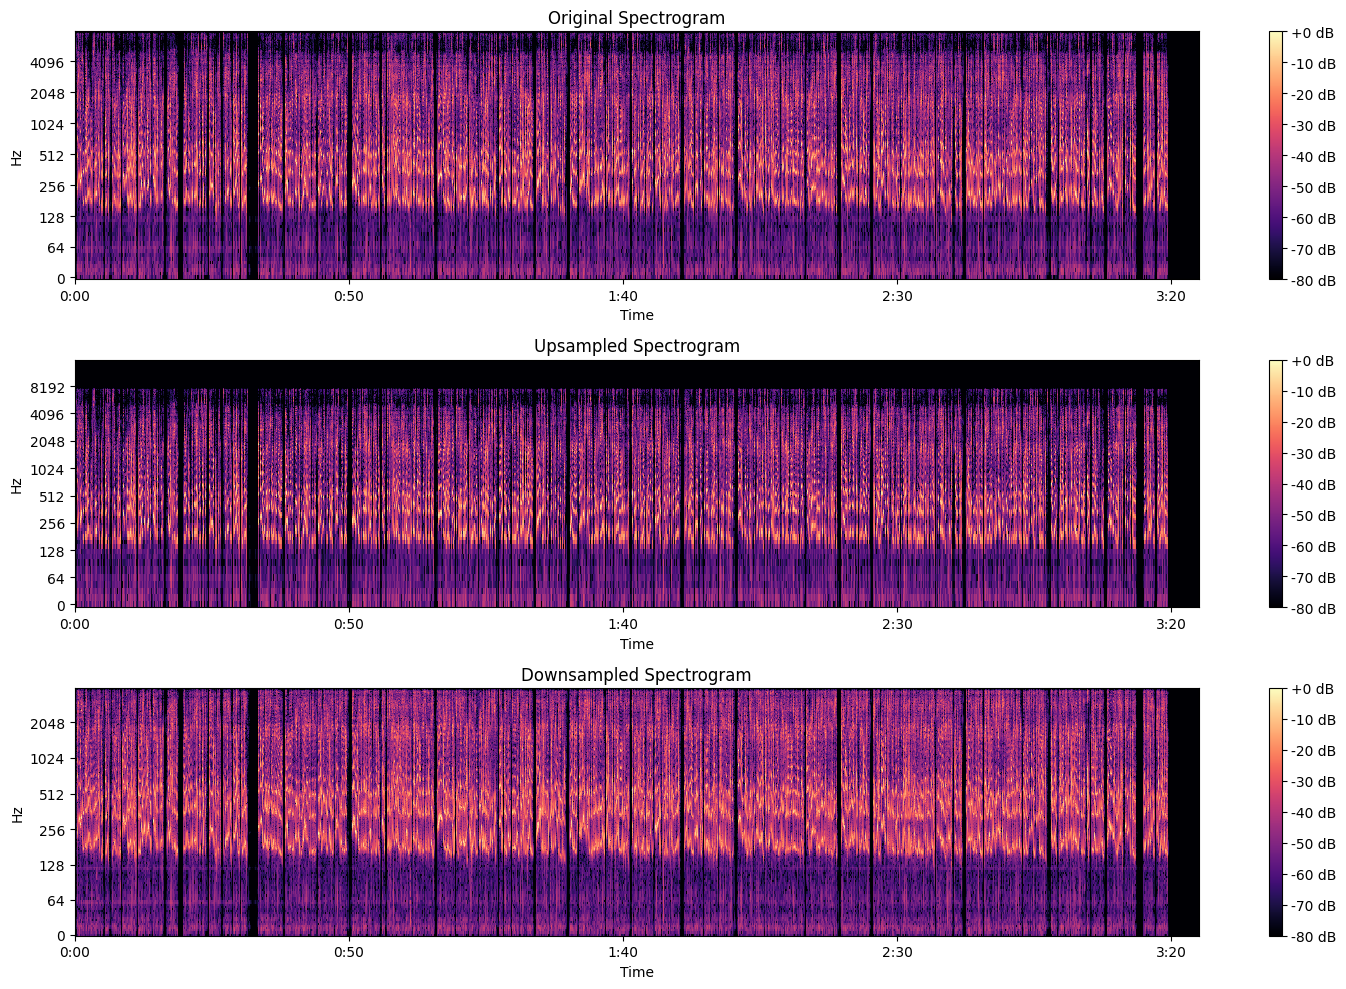

In [43]:
# Calculate spectrogram for the original, upsampled, and downsampled audio
def calculate_spectrogram(audio, sample_rate):
  spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
  return spectrogram

spectrogram_original = calculate_spectrogram(audio, sample_rate)
spectrogram_upsampled = calculate_spectrogram(upsampled_audio, sample_rate * 2)
spectrogram_downsampled = calculate_spectrogram(downsampled_audio, sample_rate // downsampling_factor)

# Plot spectrograms
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
librosa.display.specshow(spectrogram_original, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Original Spectrogram")

plt.subplot(3, 1, 2)
librosa.display.specshow(spectrogram_upsampled, sr=sample_rate * 2, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Upsampled Spectrogram")

plt.subplot(3, 1, 3)
librosa.display.specshow(spectrogram_downsampled, sr=sample_rate // downsampling_factor, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Downsampled Spectrogram")

plt.tight_layout()
plt.show()

***Observations:-***

Original Spectrogram:
The original spectrogram provides a baseline representation of the audio at its native sample rate. The x-axis represents time, the y-axis represents frequency on a logarithmic scale, and the color indicates the amplitude of different frequency components. You may notice distinct patterns corresponding to different phonemes, speech characteristics, or background noise. The original spectrogram captures the audio's inherent frequency content without any resampling.

Spectrogram after Upsampling:
After upsampling, the spectrogram displays a wider frequency range compared to the original. This increase in frequency range is due to the Nyquist theorem, which states that higher sample rates allow capturing higher frequencies. However, it's important to note that upsampling doesn't introduce new frequency information; it just changes the apparent range. In some cases, the spectrogram might appear smoother, with more details revealed in the high-frequency range. While the upsampling process might enhance the visual quality of the spectrogram, it doesn't necessarily improve the audio's actual content.

Spectrogram after Downsampling:
The spectrogram after downsampling shows a narrower frequency range compared to the original. Downsampling reduces the sample rate and thus the highest frequency that can be represented. Depending on the downsampling technique, high-frequency components might be attenuated or lost, leading to a potential loss of detail in the audio signal. In the spectrogram, observed that high-frequency features are less pronounced or even missing. Downsampling can lead to a loss of audio quality, particularly if the original audio contains important high-frequency content.

Question 5

In [45]:
def save_audio_chunk(audio, sample_rate, duration, output_path, format):
  chunk_length = int(sample_rate * duration)
  sf.write(output_path, audio[:chunk_length], sample_rate, format=format)

# Randomly select an audio file
class_names = os.listdir(dir_addr)
random_class = np.random.choice(class_names)
class_path = os.path.join(dir_addr, random_class)
audio_files = [audio_file for audio_file in os.listdir(class_path) if audio_file.endswith('.wav')]

num_audio_files_to_select = 1
all_indices = np.arange(len(aud_pths))

# Generate distinct indices using linear recurrence
selected_indices = rand_lin_recur(seed=0, modulus=len(aud_pths), multiplier=1664525, increment=1013904223, num_values=num_audio_files_to_select)

# Get the corresponding audio file paths based on selected indices
random_audio_file = aud_pths[selected_indices[0]]
print(random_audio_file)




# random_audio_file = np.random.choice(audio_files)
# print(random_audio_file)



random_audio_path = os.path.join(class_path, random_audio_file)


/content/drive/MyDrive/AUDIO_DATA/CLASS 1/0020.wav


In [46]:
# Load the random audio file
audio, sample_rate = librosa.load(random_audio_path, sr=None)

# Ensure the audio duration is at least 2 seconds
min_duration = 2.0
if len(audio) < int(sample_rate * min_duration):
  repetitions_needed = int(np.ceil(min_duration * sample_rate / len(audio)))
  audio = np.tile(audio, repetitions_needed)

# Randomly select a starting point for the chunk
# chunk_start = np.random.randint(0, len(audio) - int(sample_rate * min_duration))
chunk_start_values = rand_lin_recur(seed=0, modulus=len(audio) - int(sample_rate * min_duration), multiplier=1664525, increment=1013904223, num_values=1)
chunk_start = chunk_start_values[0]

# Define chunk duration
chunk_duration = 2.0

# Extract the audio chunk
audio_chunk = audio[chunk_start:chunk_start + int(sample_rate * chunk_duration)]


In [48]:
output_mp3_path = 'audio_chunk.mp3'
output_flac_path = 'audio_chunk.flac'
save_audio_chunk(audio_chunk, sample_rate, chunk_duration, output_mp3_path, format='mp3')
save_audio_chunk(audio_chunk, sample_rate, chunk_duration, output_flac_path, format='flac')

# Load the saved audio files
audio_chunk_mp3, sample_rate_mp3 = librosa.load(output_mp3_path, sr=None)
audio_chunk_flac, sample_rate_flac = librosa.load(output_flac_path, sr=None)

# Calculate spectrograms for all formats
def calculate_spectrogram(audio, sample_rate):
  spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
  return spectrogram

spectrogram_wav = calculate_spectrogram(audio_chunk, sample_rate)
spectrogram_mp3 = calculate_spectrogram(audio_chunk_mp3, sample_rate_mp3)
spectrogram_flac = calculate_spectrogram(audio_chunk_flac, sample_rate_flac)


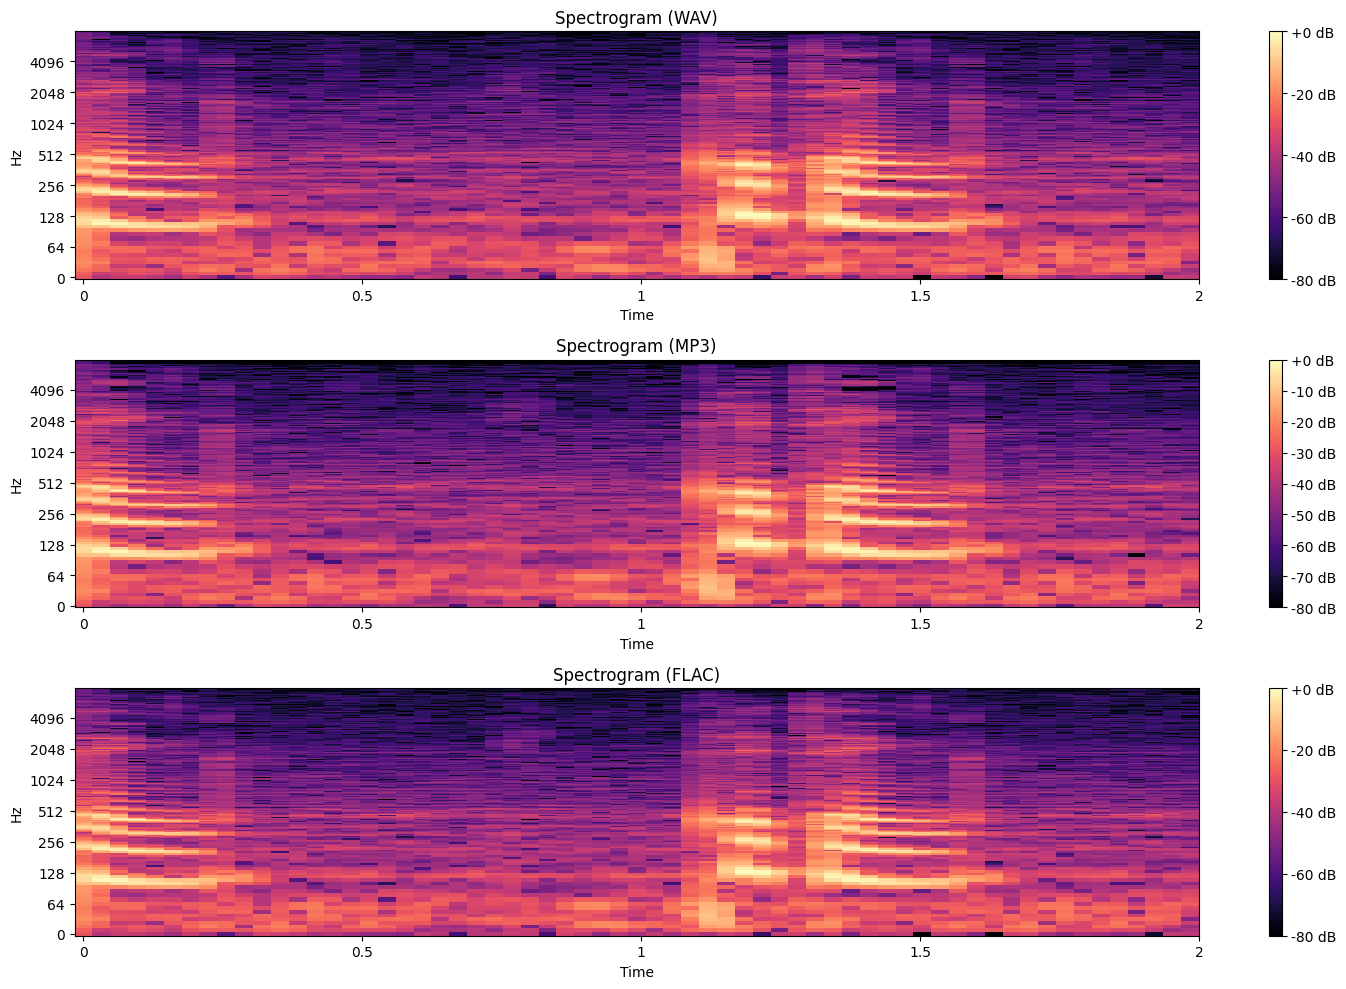

In [49]:
# Plot spectrograms
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
librosa.display.specshow(spectrogram_wav, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (WAV)")

plt.subplot(3, 1, 2)
librosa.display.specshow(spectrogram_mp3, sr=sample_rate_mp3, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (MP3)")

plt.subplot(3, 1, 3)
librosa.display.specshow(spectrogram_flac, sr=sample_rate_flac, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (FLAC)")

plt.tight_layout()
plt.show()

Observations:

* The spectrograms of the original .wav file, the saved .mp3 file, and the saved .flac file are compared side by side.

* we noticed differences in the spectrograms, particularly in the higher frequency range and the level of detail present.

* The differences are due to the compression algorithms used in .mp3 and .flac formats, which can lead to loss of some audio information.

* .wav files are lossless and contain all the original audio information, while compressed formats like .mp3 and .flac achieve smaller file sizes by sacrificing some audio fidelity.

* The visual comparison of spectrograms allows to observe the impact of compression on the audio quality, particularly in terms of the frequency content and details present in the audio.

### **Part - C**

Question 1

In [50]:
csv_pth = "/content/drive/MyDrive/TEXT_DATA/Hindi_English_parallel.csv"
df = pd.read_csv(csv_pth)

In [51]:
english_tot_ln = df["english_sentence"].str.len().sum()
print(english_tot_ln)
hindi_tot_ln = df["hindi_sentence"].str.len().sum()
print(hindi_tot_ln)

15914590.0
15324133


In [52]:
num_sam = len(df)
print(num_sam)

177606


In [53]:
eng_avg_ln = english_tot_ln / num_sam
hin_avg_ln = hindi_tot_ln / num_sam

In [54]:
print(f"Average Text length in of English Corpus {eng_avg_ln:.2f}")
print(f"Average Text length in of hindi Corpus {hin_avg_ln:.2f}")

Average Text length in of English Corpus 89.61
Average Text length in of hindi Corpus 86.28


Ques2

In [58]:
# Simulate randomness using a deterministic approach with linear recurrence
num_indices_to_select = 20
all_indices = np.arange(len(df))

# Generate distinct indices using linear recurrence
selected_indices = rand_lin_recur(seed=0, modulus=len(df), multiplier=1664525, increment=1013904223, num_values=num_indices_to_select)

# Select 20 parallel texts
selected_data = df.iloc[selected_indices]

# Function to remove special characters
def remove_special_characters_eng(text):
  cleaned_text = ''.join(char for char in text if char.isalnum() or char.isspace())
  return cleaned_text


# Function to remove special characters
def remove_special_characters_hin(text):
  bad_chr = [',','.','-','=','+',':',';','/','?','<','>','|','(',')','{','}','[',']','।']
  cleaned_text = ''.join(char for char in text if char not in bad_chr)
  if(cleaned_text[-1] == '।'):
    cleaned_text.replace('।','')
  return cleaned_text

# Apply the cleaning function to the selected data
cleaned_data = selected_data.copy()
cleaned_data['English_Cleaned'] = cleaned_data['english_sentence'].apply(remove_special_characters_eng)
cleaned_data['Hindi_Cleaned'] = cleaned_data['hindi_sentence'].apply(remove_special_characters_hin)

# Display the cleaned data
for index, row in cleaned_data.iterrows():
  print(f"English: {row['english_sentence']} -> \n Cleaned: {row['English_Cleaned']}")
  print(f"Hindi: {row['hindi_sentence']} -> \n Cleaned: {row['Hindi_Cleaned']}")
  print("=" * 50)


English: The former practice of musical scales held away till about the fifteenth century ; but in due course the latter gained ground and eventually replaced the other . -> 
 Cleaned: The former practice of musical scales held away till about the fifteenth century  but in due course the latter gained ground and eventually replaced the other 
Hindi: संगीत की स्केल पद्धति ने लगभग 15वीं शताब्दी तक राज किया , लेकिन धीरे धीरे दूसरी पद्धति ने जड़ें जमानी शुरू कीं और धीरे धीरे पहली को बेदखल कर दिया . -> 
 Cleaned: संगीत की स्केल पद्धति ने लगभग 15वीं शताब्दी तक राज किया  लेकिन धीरे धीरे दूसरी पद्धति ने जड़ें जमानी शुरू कीं और धीरे धीरे पहली को बेदखल कर दिया 
English: They are generally longer than wide , narrow at the tip and are attached to the body by a narrow base . -> 
 Cleaned: They are generally longer than wide  narrow at the tip and are attached to the body by a narrow base 
Hindi: सिरे पर संकरे होते हैं और एक संकीर्ण आधार द्वारा शरीर से जुडऋए रहते है . -> 
 Cleaned: सिरे पर संकरे होत

Ques3

In [59]:
# Simulate randomness using a deterministic approach with linear recurrence
num_indices_to_select = 50
all_indices = np.arange(len(df))

# Generate distinct indices using linear recurrence
random_indices = rand_lin_recur(seed=0, modulus=len(df), multiplier=1664525, increment=1013904223, num_values=num_indices_to_select)




# random_indices = random.sample(range(len(df)), 50)
random_parallel_texts = df.iloc[random_indices]

def create_word_dictionary(texts):
  words = ' '.join(texts).split()
  unique_words = list(set(words))
  word_dictionary = {word: number for number, word in enumerate(unique_words)}
  return word_dictionary

english_word_dict = create_word_dictionary(random_parallel_texts['english_sentence'])
hindi_word_dict = create_word_dictionary(random_parallel_texts['hindi_sentence'])

print("English Word Dictionary:")
for word, number in list(english_word_dict.items())[:]:
  print(f"{word}: {number}")

print("\nHindi Word Dictionary:")
for word, number in list(hindi_word_dict.items())[:]:
  print(f"{word}: {number}")

English Word Dictionary:
than: 0
their: 1
blood: 2
further: 3
sahaba: 4
visible: 5
particular: 6
fresh: 7
scab: 8
saved: 9
I: 10
tragic: 11
by: 12
attached: 13
Clinton: 14
station: 15
help: 16
off: 17
writing: 18
case: 19
scores: 20
discharge: 21
representatives: 22
judge: 23
bus: 24
base: 25
Sadakat: 26
start: 27
knowledge.: 28
Due: 29
giving: 30
filled: 31
but: 32
to: 33
They're: 34
practice: 35
questions: 36
were: 37
service: 38
imply: 39
Cricket: 40
peaks: 41
Department: 42
slows: 43
becoming: 44
Ashram: 45
One: 46
Kalyan: 47
remains: 48
Thus: 49
only: 50
less: 51
life: 52
ceases: 53
husband: 54
over: 55
little: 56
gained: 57
government: 58
ever: 59
century: 60
forms: 61
apples: 62
henna: 63
reading: 64
heredity: 65
didn't: 66
,: 67
fascination: 68
patient: 69
being: 70
points: 71
away: 72
disasters: 73
retirement: 74
The: 75
he: 76
cricketers: 77
you: 78
Parliamentary: 79
stay: 80
property: 81
itself: 82
accommodated: 83
override: 84
waiting,: 85
president: 86
saw: 87
areas: 88
ha

Quesn4

In [60]:
data = df.dropna(subset=['english_sentence'])

combined_text = ' '.join(data['english_sentence'])

words_with_punctuation = combined_text.split()

translator = str.maketrans('', '', string.punctuation)
words = [word.translate(translator) for word in words_with_punctuation]

words = [word for word in words if word != '']

word_counts = {}
for word in words:
  word_counts[word] = word_counts.get(word, 0) + 1

most_occurring_words = sorted(word_counts.keys(), key=lambda word: word_counts[word], reverse=True)[:10]
top_words, word_freq = [], []
for word in most_occurring_words:
  top_words.append(word)
  word_freq.append(word_counts[word])







data = df.dropna(subset=['hindi_sentence'])
combined_text_hindi = ' '.join(data['hindi_sentence'])
words_with_punctuation_hindi = combined_text_hindi.split()
translator = str.maketrans('', '', string.punctuation)
words_hindi = [word.translate(translator) for word in words_with_punctuation_hindi]
words_hindi = [word for word in words_hindi if word != '']

word_counts_hindi = {}
for word in words_hindi:
  word_counts_hindi[word] = word_counts_hindi.get(word, 0) + 1

most_occurring_words_hindi = sorted(word_counts_hindi.keys(), key=lambda word: word_counts_hindi[word], reverse=True)[:11]
top_words_hindi, word_freq_hindi = [], []
for word in most_occurring_words_hindi:
  if(word == '।'):
    continue;
  top_words_hindi.append(word)
  word_freq_hindi.append(word_counts_hindi[word])


<ipython-input-61-c442574c6a01>:22: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout()
<ipython-input-61-c442574c6a01>:22: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


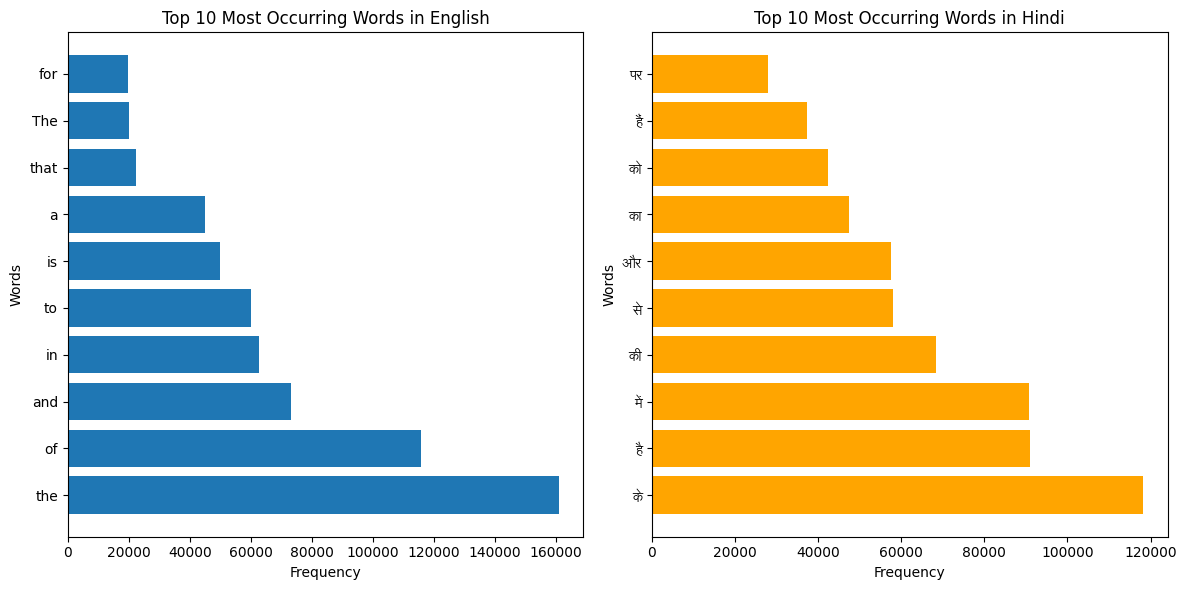

In [61]:
# Plot histograms for English and Hindi
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(top_words, word_freq)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Occurring Words in English')


hin_f_pth = "/content/drive/MyDrive/Lohit-Devanagari.ttf"
br = fm.FontProperties(fname=hin_f_pth)

plt.subplot(1, 2, 2)

plt.barh(top_words_hindi, word_freq_hindi, color='orange')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.yticks(fontproperties=br)
plt.title('Top 10 Most Occurring Words in Hindi')

plt.tight_layout()
plt.show()